<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo Final de Master</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Helia Marina Peña Alonso</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# **Evaluación de soluciones a la problemática del etiquetado en la recolección de datos**

### **Índice**

 * **0. Carga de librerias**
 * **1. Introducción**
 
 
   * **1.1. Visualización y comprensión de las variables para un usuario**
  
  
 * **2. Preprocesamiento de los datos**
 
 
   + **2.1. Carga y limpieza de datos**
   + **2.2. Creaccion del subconjunto de características y etiquetas**
   + **2.3. Matriz de correlacion**
  
  
 + **3. Aplicación técnicas de Machine Learning**
 
 
   + **3.1. Resultados**
      + **3.1.1. Tablas**
      + **3.1.2. Matrices de confusión**
      + **3.1.3. Evolución le las precisiones**
      
 + **4. Evaluación de la calidad de los resultados**
     + **4.1. Resultados**
 + **5. Conclusiones**

## **0. Carga de librerias**

In [5]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import HTML, display_html, display

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import random
import time
import csv

# Algoritmos semi-supervisados
# ==============================================================================
import sys
sys.path.insert(0, '/home/hmpena/sslearn')
from sslearn.wrapper import TriTraining, SelfTraining, CoTrainingByCommittee, CoTraining, DeTriTraining, DemocraticCoLearning, CoForest
from sslearn.model_selection import artificial_ssl_dataset

# Warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Creacción de una semilla
# ==============================================================================
random_state = np.random.RandomState(42)

# Warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **1. Introduccion**

En el siguiente proyecto se estudia la precisión de diferentes algoritmos de Machine Learning en la tarea de creación de etiquetas de alta calidad.


Los datos con los que se realiza el estudio son 30 csv etiquetados, correspondientes a 30 usuarios. Las técnicas de ML empeadas pertenecen a la metodología supervisada y semi-supervisada. 

Los algoritmos semi-supervisados, se basan en entrenar un clasificador supervisado utilizando un conjunto de datos etiquetado pequeño y otro conjunto de datos no etiquetados mucho más grande. Este clasificador extrae características para generalizarlas y crear pseudoetiquetas de alta calidad a los datos no etiquetados.

**Información Variables**

+ daqtime: Tiempo del experimento. Medidas en milisegundos (ms).
+ ecg: Sensor de electrocardiograma. Medidas en milivoltios (mV).
+ bvp: Sensor de pulso de volumen de sangre. Medidas en porcentaje BVP.
+ gsr: Sensor de respuesta galvánica de la piel. Medidas en microSiemens (US).
+ rsp: Sensor de respiración. Medidas en porcentaje de respiración.
+ skt:Sensor de temperatura de la piel. Medidas en grados Celsius (°C).
+ emg_zygo: Sensor de electromiografía de superficie (sEMG) colocado en los músculos Zygomaticus major. Medidas en microvoltios (uV).
+ emg_coru: Sensor de electromiografía de superficie (sEMG) colocado en los músculos superciliares del corrugador. Medidas en microvoltios (uV).
+ emg_trap: Sensor de electromiografía de superficie (sEMG) colocado en los músculos trapecio. Medidas en microvoltios (uV).
+ video: Identificacion del video. El usuario visualiza 12 videos durante el experimento, cada uno intenta expresar una emoción diferente. 

    Clasificación:
    + Video 1 y 2: Diversión
    + Video 3 y 4: Aburrimiento
    + Video 5 y 6: Relax
    + Video 7 y 8: Miedo
    + Video 10: Apertura que pretende relajar
    + Video 12: Cierre que pretende relajar también
    + Video 11: Pantalla azul, este video se coloca entre los videos anteriores para estabilizar variables fisiológicas

## **1.1 Visualización y comprensión de las variables para un usuario**

In [210]:
# Visualizamos uno de los csv
ph1 = pd.read_csv('interpolated/physiological/sub_1.csv')
print(f'El número de instancias de ph1 y de características es: {ph1.shape}')
ph1.head()

El número de instancias de ph1 y de características es: (2451584, 10)


,daqtime,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video
0,0,0.846,38.172,11.749,27.610,29.495,7.288,8.684,6.550,10
1,1,0.836,38.249,11.737,27.601,29.488,7.288,8.725,6.468,10
2,2,0.843,38.058,11.757,27.600,29.488,7.329,8.726,6.589,10
3,3,0.836,38.075,11.730,27.572,29.481,7.207,8.644,6.468,10
4,4,0.852,38.210,11.745,27.591,29.484,7.247,8.765,6.507,10


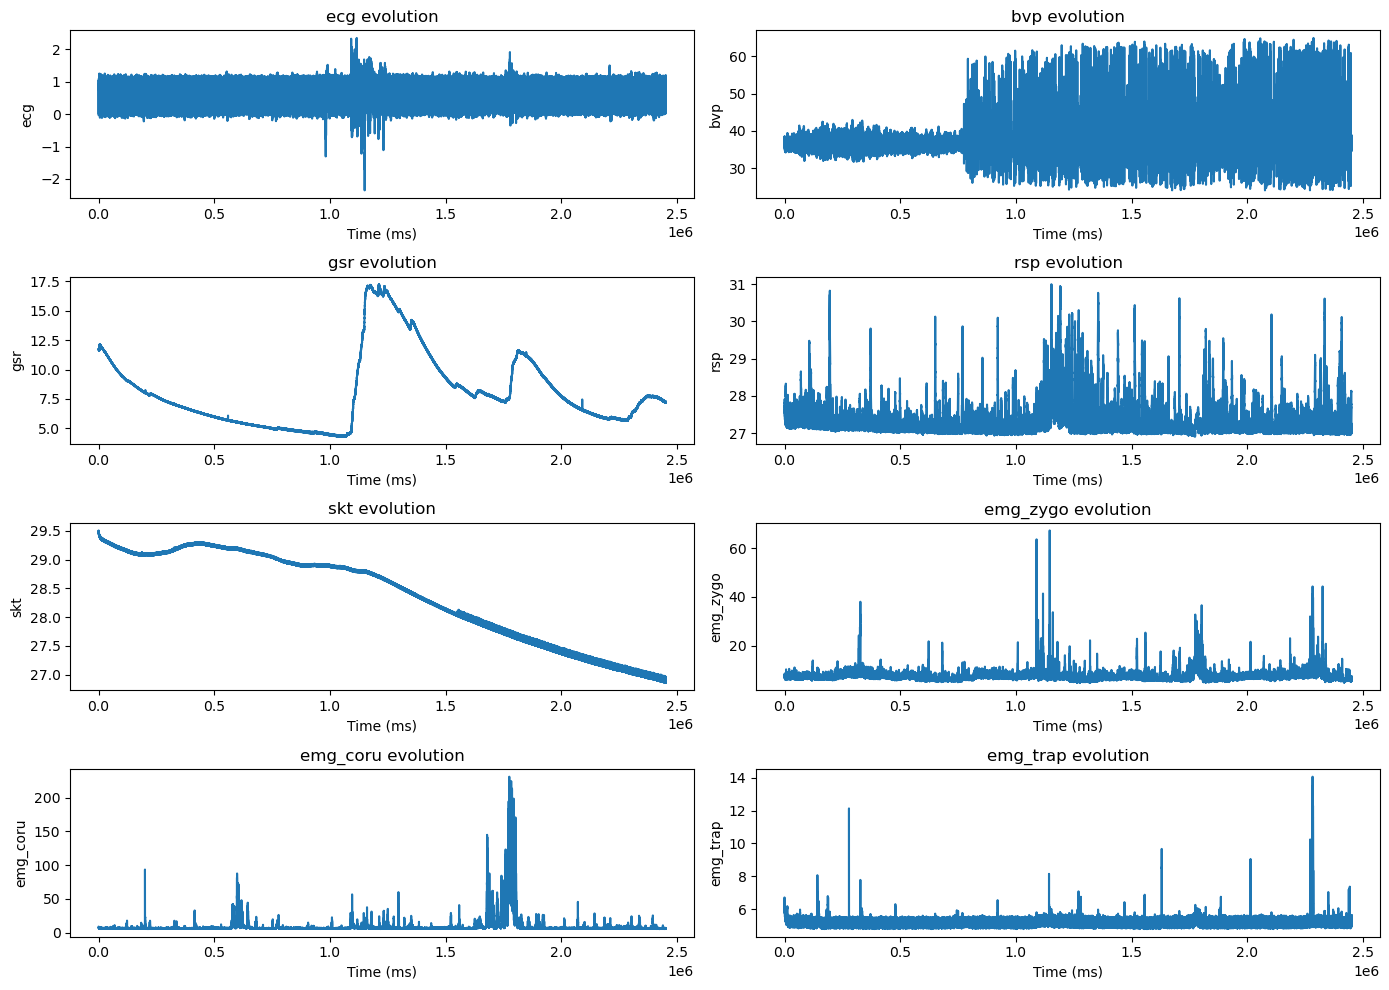

In [113]:
# Visualización de variables continuas para un usuario
fig, axs = plt.subplots(4, 2, figsize=(14, 10))

columns = ['ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']

row = [0, 0, 1, 1, 2, 2, 3, 3]
col = [0, 1, 0, 1, 0, 1, 0, 1]

for column, col, row in zip(columns, col, row):
    axs[row, col].plot(ph1['daqtime'], ph1[column])
    axs[row, col].set_xlabel('Time (ms)')
    axs[row, col].set_ylabel(column)
    axs[row, col].set_title(f'{column} evolution')

plt.tight_layout()
plt.show()

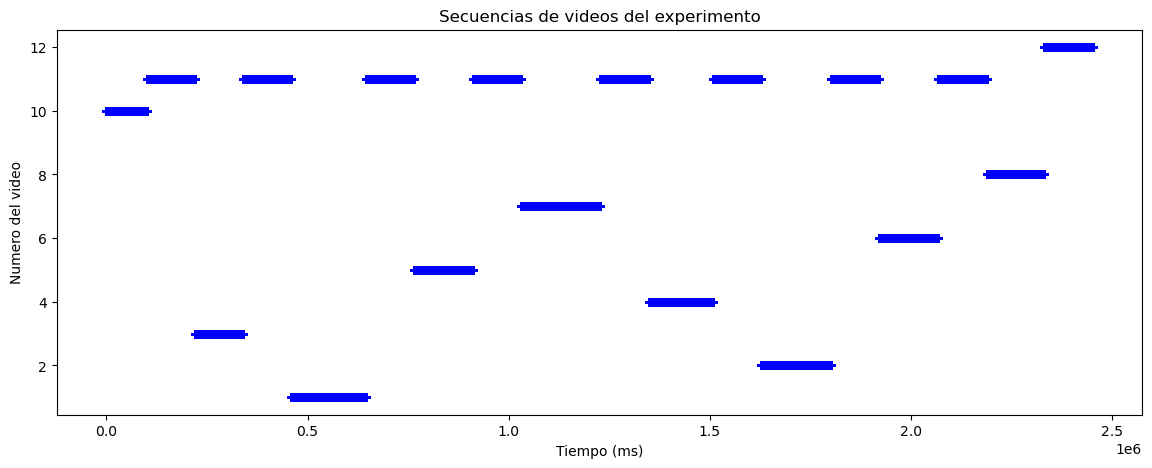

In [114]:
#Representacion duración de los vídeos
plt.figure(figsize=(14, 5))
plt.plot(ph1.daqtime, ph1.video, 'b+')
plt.title('Secuencias de videos del experimento')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Numero del video')
plt.show()

In [115]:
#Tiempo de duracion de los vídeos
video_start = ph1.groupby('video')['daqtime'].first()
video_end = ph1.groupby('video')['daqtime'].last()
video_duration = (video_end - video_start)//1000
video_duration[11] = video_duration[11]//8
video_duration

video
1     185
2     173
3     118
4     160
5     145
6     146
7     196
8     143
10    101
11    260
12    119
Name: daqtime, dtype: int64

Durante el proceso de recolección de datos, el usuario observa 18 vídeos, cada uno con una duración diferente.

Como la frecuencia de recolección de datos es de 1000 Hz, el archivo CSV contiene un gran número de instancias para un solo usuario. Sin embargo, dado que el experimento se repitió con otros 29 usuarios, la concatenación de todos los archivos CSV resultaría en un conjunto demasiado grande e irrelevante para el problema que se pretende abordar.

Con el fin de reducir el tamaño de los archivos CSV, se realiza una reducción en la escala temporal, pasando de milisegundos a segundos, mediante el cálculo del promedio de los valores recogidos en cada segundo. Además, se eliminan los valores extremos de los atributos que no alcanzan a completar un segundo.

Se asigna la misma clase a los videos que expresan una misma emoción. Asimismo, se eliminan los videos 10, 11 y 12, ya que no pretenden provocar ningún estado de ánimo en el usuario.

El etiquetado final del archivo CSV que contiene a los 30 usuarios es el siguiente:

 + 1: Diversión
 + 2: Aburrimiento
 + 3: Relax
 + 4: Miedo
 
# **2. Preprocesado de los datos**

In [2]:
def Clean(Df):
    '''
    Función que realiza el preprocesado de los csv
    
    Parametros
    ---------- 
    Df: Dataframe a pre-procesar
    
    Devoluciones
    -------
    df_grouped: Dataframe preprocesado
    '''
    #Creamos un nuevo df que sea copia del original
    df_grouped = Df.copy()
  
    #Agrupamos cada 1000 instancias
    df_grouped['group'] = np.floor_divide(df_grouped['daqtime'], 1000)
    df_grouped = df_grouped.groupby('group').mean().reset_index()
    df_grouped['daqtime'] = (df_grouped['group'] * 1000) + 1
    #Eliminamos la columna daqtime y renombramos group que es nuestro actual daqtime en s
    df_grouped = df_grouped.drop('daqtime', axis=1)
    df_grouped = df_grouped.rename(columns={'group': 'daqtime'})
    # Como no todos los vídeos duraban una cantidad exacta de s tenemos nuevas instancias que mezclan características del video etiquetado y el azul de transición.
    # Por lo que eliminaremos estas filas.
    n_videos = pd.unique(Df.video)
    for i in df_grouped.video:
        if i not in n_videos:
            df_grouped = df_grouped.drop(df_grouped[df_grouped['video'] == i].index)

    # Iteramos a través de cada video
    for video_num in df_grouped['video'].unique():
        video_length = len(df_grouped[df_grouped['video'] == video_num])
        # reemplazar los valores de la columna "daqtime"
        df_grouped.loc[df_grouped['video'] == video_num, 'daqtime'] = range(video_length)
        # ajustar la secuencia de daqtime para cada repetición del video
        video_count = 0
        for index, row in df_grouped.loc[df_grouped['video'] == video_num].iterrows():
            if video_count > 0 and row['video'] == video_num:
                df_grouped.at[index, 'daqtime'] = df_grouped.at[index, 'daqtime'] - video_length * video_count
            if row['video'] != video_num:
                video_count += 1
  
    # Eliminamos los vídeos que no nos interesan, 10, 11 y 12
    df_grouped = df_grouped.drop(df_grouped[(df_grouped['video'] == 10) | (df_grouped['video'] == 11) |
                                            (df_grouped['video'] == 12)].index)

    # Agrupamos los videos de misma clase
    df_grouped.video = df_grouped.video.replace({2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7:4, 8:4})
    df_grouped.video = df_grouped.video.astype(int)

    #Reordenamos los índices
    df_grouped = df_grouped.reset_index(drop=True)
  
    return df_grouped

### **2.1. Carga y limpieza de datos**

In [3]:
def load_physiological_data(num_subjects):
    '''
    Función que carga y concatena un número de csv de distintos usuarios.
    Esta función llama a la función Clean para el preprocesado de los datos.
    Parametros
    ---------- 
    num_subjects: Número de usuarios
    Devoluciones
    -------
    phys_dfs: Dataframe de los num_subjects usuarios concatenados
    '''
    # Cargamos el primer df
    phys_dfs = pd.read_csv('interpolated/physiological/sub_1.csv')
    # Aplicamos la función limpieza
    phys_dfs = Clean(phys_dfs)

    # Iteramos sobre el número de sujetos y leemos y concatenamos los archivos csv
    for i in range(2, num_subjects+1):
        df = pd.read_csv(f'interpolated/physiological/sub_{i}.csv')
        df = Clean(df)
        phys_dfs = pd.concat([phys_dfs, df], ignore_index=True)

    # Devolvemos el dataframe concatenado
    return phys_dfs

In [6]:
# Cargamos los 30 csv de los 30 usuarios
phys_data = load_physiological_data(30)

print('Tamaño final del dataset', phys_data.shape)

Tamaño final del dataset (37860, 10)


 Observamos como se ha conseguido un dataset de tamaño moderado para los treinta usuarios.

### **2.2. Creaccion del subconjunto de características y etiquetas**

In [7]:
#Seleccionamos las características y las etiquetas
features = ['ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']
label = ['video']

#Creamos las variables X_all e y_all
X_all = np.array(phys_data[features])
y_all = np.array(phys_data[label])
print('Las dimensiones del objeto X_all que contiene las features son:', X_all.shape)
print('Las dimensiones del objeto y_all que contiene las clases son:', y_all.shape)

Las dimensiones del objeto X_all que contiene las features son: (37860, 8)
Las dimensiones del objeto y_all que contiene las clases son: (37860, 1)


### **2.3. Matriz de correlacion**

Vamos a representar la matriz de correlación para estudiar la relación entre los atributos numéricos.

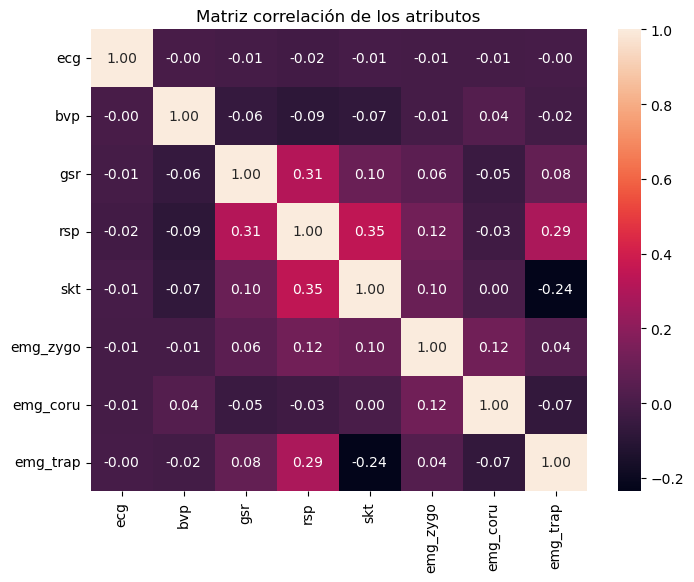

In [120]:
# Creamos un df sólo con los atributos
ph = phys_data.drop(['daqtime', 'video'], axis=1)

# Creamos la matriz de correlación
corr_df = ph.corr(method='pearson')
# Representamos
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt='.2f')
plt.title('Matriz correlación de los atributos')
plt.show()

Observamos como ninguna de las ocho distintas variables presenta una fuerte relación con otra. 
  Los atributos más correlacionados son la respiración (rsp) con la temperatura de la piel (skt) y la respuesta galvánica de la piel (gsr). De manera que si el usuario aumenta su respiración bién porque se se está poniendo nervisoso o se está divirtiendo las variables de los sensores de la piel aumentan también aunque en pequeño porcentaje ( La correlación es del 35-31 %). De manera inversa vemos cómo a medida que aumenta la temperatura de la piel (skt) disminuye la tensión del músculo trapecio. 

# **3. Aplicación de métodos semi-supervisados y supervisados**


Se aplican distintas técnicas de aprendizaje automático (supervisadas y semisupervisadas) al conjunto de datos creado en el apartado 2. El desempeño de los distintos algoritmos se ha medido utilizando la métrica de precisión (accuracy), calculada a partir del entrenmiento de los modelos mediante diferentes porcentajes de datos etiquetados del conjunto de datos original.

   Los algoritmos semi-supervisados utilizados son:

+ Self-training: Usando como estimador base DecisionTree
+ Co-training: Usando como estimador base DecisionTree
+ Tri-training: 3 versiones, con DecisionTree, GaussianNB y KNN
+ Democratic co-training: 1 versión con DecisionTree, GaussianNB y KNN
+ Co-Forest: 

Y los supervisados:
+ Decision tree
+ Logistic regresion
+ Random Forest

In [212]:
# Creación de funciones para la ejecución del experimento
def get_labeled_data(X,y):
    """
    Función que devuelve los datos etiquetados
    Parámetros
    ----------
    X: array-like, shape (n_samples, n_features). Las muestras de entrada.
    y: array-like, shape (n_samples,). Los valores objetivo.
    Devoluciones
    -------
    X: array-like, shape (n_samples, n_features). Las muestras de entrada.
    y: array-like, shape (n_samples,). Los valores objetivo.
    """
    df = pd.DataFrame(X)
    df['y'] = pd.Series(y)

    #Eliminamos los valores -1 en y
    df = df[df['y'] != -1]

    X = df.drop(columns=['y']).values
    y = df['y'].values

    return X,y

def create_metrics(file_name, row):
    """
    Parámetros
    ----------
    file_name: string
    Nombre del archivo donde se guardarán las métricas.
    row: list. Lista con el nombre de las columnas.
    Devoluciones
    -------
    Ninguna
    """
    with open("Results/"+file_name, 'w') as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow(row)



def save_metrics(model, rep, kfold, lp, y_test, y_pred, file_name):
    """
    Parámetros
    ----------
    model: string. Nombre del modelo.
    rep: int. Número de repetición.
    kfold: int. Número de kfold.
    lp: int. Proporción de etiquetas.
    y_test: array-like, shape (n_samples,). Los valores objetivo.
    y_pred: array-like, shape (n_samples,). Los valores predichos.
    file_name: string. Nombre del archivo donde se guardarán las métricas.
    Devoluciones
    -------
    Ninguna
    """
    acc = accuracy_score(y_test, y_pred)
    y_test = list(y_test)
    y_pred = list(y_pred)

    with open("Results/"+file_name,"a") as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([model, rep, kfold, lp, y_test, y_pred, acc])

In [213]:
# Nombre del csv 
file_name = "results_models.csv"
X = phys_data.drop(["daqtime", 'video'], axis=1)
y = phys_data['video']

# Definimos los modelos a ejecutar e iniciamos el experimento
# Modelos SSL, excepto Co-Training
ssl_models = {"SelfTraining":SelfTraining(base_estimator=DecisionTreeClassifier(random_state=random_state)), 
              "TriTraining":TriTraining(random_state=random_state), 
              "DemocraticCo":DemocraticCoLearning(random_state=random_state),
              "CoForest":CoForest(random_state=random_state)}

# Modelos SL
sl_models = {"RandomForest":RandomForestClassifier(n_estimators=7),
             "DecisionTree":DecisionTreeClassifier(random_state=random_state),
             "LogisticRegression":LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=random_state)}

# Estimador base de Co-Training
base_estimator_co = {"DT":DecisionTreeClassifier(random_state=random_state)}

#Proporción de etiquetas de 0.1 a 0.9 con paso de 0.1
label_prop = np.arange(0.1,0.91,0.1)

# Creamos archivo de resultados
row = ["model", "rep", "kfold", "lp", "y_test", "y_pred", "acc"]
create_metrics(file_name,row)

# Repetimos el experimento 5 veces
for r in range(5):
    print("-> REP: ",r, flush=True)

    #Stratified kfold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    k=0
    
    #For each fold
    for train_index, test_index in skf.split(X, y):
        print("--> KFOLD nº: ", k, flush=True)

        #Separacion train/test data
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        #Inicio de la proporcion de etiquetas
        for lp in label_prop:
            print("---> Label percentage: ", lp, flush=True)
            
            X_train_ssl, y_train_ssl, X_unlabel, y_unlabel = artificial_ssl_dataset(X_train, y_train, lp, random_state=random_state)

            #Eliminalos las intancias desetiquetadas creando los conjuntos train para los metodos supervisados
            X_train_supervised, y_train_supervised = get_labeled_data(X_train_ssl, y_train_ssl)

            #Modelos SSL sin Co-Training
            for ssl_m in ssl_models:
                print("----> SSL model: ", ssl_m, flush=True)
                model = ssl_models[ssl_m]
                model.fit(X_train_ssl, y_train_ssl)
                y_pred = model.predict(X_unlabel)
                save_metrics(ssl_m,r,k,lp, y_unlabel, y_pred, file_name)

            #Co-Training
            indices_columnas = list(range(X_train_ssl.shape[1]))
            columnas_X1 = random.sample(indices_columnas, X_train_ssl.shape[1]//2)
            columnas_X2 = [col for col in indices_columnas if col not in columnas_X1]
            # Iniciamos el bucle de los estimadores base de Co-Training
            for bs in base_estimator_co:
                print("----> SSL model: CoTraining", flush=True)
                base_estimator = base_estimator_co[bs]
                model = CoTraining(base_estimator = base_estimator, random_state=random_state)
                model.fit(X_train_ssl, y_train_ssl, features = [columnas_X1, columnas_X2])
                y_pred = model.predict(X_unlabel)
                save_metrics("CoTraining",r,k,lp,y_unlabel,y_pred, file_name)
            
            #Modelos SL
            for sl_m in sl_models:
                print("----> SL model: ", sl_m, flush=True)
                model = sl_models[sl_m]
                model.fit(X_train_supervised, y_train_supervised)
                y_pred = model.predict(X_unlabel)
                save_metrics(sl_m,r,k,lp,y_unlabel, y_pred, file_name)
            
        print("\n-----------------------------------------------------------------\n\n", flush=True)
        k+=1
    print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n",flush=True)
print("\n\n\nFINISH", flush=True)

-> REP:  0
--> KFOLD nº:  0
---> Label percentage:  0.1
----> SSL model:  SelfTraining
----> SSL model:  TriTraining
----> SSL model:  DemocraticCo
----> SSL model:  CoForest
----> SSL model: CoTraining
----> SL model:  RandomForest
----> SL model:  DecisionTree
----> SL model:  LogisticRegression
---> Label percentage:  0.2
----> SSL model:  SelfTraining
----> SSL model:  TriTraining
----> SSL model:  DemocraticCo
----> SSL model:  CoForest
----> SSL model: CoTraining
----> SL model:  RandomForest
----> SL model:  DecisionTree
----> SL model:  LogisticRegression
---> Label percentage:  0.30000000000000004
----> SSL model:  SelfTraining
----> SSL model:  TriTraining
----> SSL model:  DemocraticCo
----> SSL model:  CoForest
----> SSL model: CoTraining
----> SL model:  RandomForest
----> SL model:  DecisionTree
----> SL model:  LogisticRegression
---> Label percentage:  0.4
----> SSL model:  SelfTraining
----> SSL model:  TriTraining
----> SSL model:  DemocraticCo
----> SSL model:  CoFor

## **3.1. Resultados**

In [131]:
# Cargamos los resultados de los modelos ejecutados anteriormente
models_results = pd.read_csv("Results/results_models.csv", delimiter=";")

# Procesamos los datos y_test e y_pred para poder trabajar con ellos
models_results['y_test'] = models_results['y_test'].str.strip('[]').apply(lambda x: x.replace(',', ''))
models_results['y_pred'] = models_results['y_pred'].str.strip('[]').apply(lambda x: x.replace(',', ''))

models_results['y_test']= [np.array(cadena.split(), dtype=int) for cadena in models_results['y_test']]
models_results['y_pred'] = [np.array(cadena.split(), dtype=int) for cadena in models_results['y_pred']]
models_results.head(2)

,model,rep,kfold,lp,y_test,y_pred,acc
0,SelfTraining(DT),0,0,0.1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 2, 1, 2, 4, 2, 4, 3, 2, 2, 2, 3, 3, 2, ...",0.756999
1,TriTraining,0,0,0.1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, ...",0.808241


### **3.1.1. Tablas de resultados**

In [188]:
#Agrupamos por modelo, lp y obtenemos el promedio de las precisiones obtenidas
Tabla = models_results.groupby(['model', 'lp'])['acc'].mean().unstack()
# Convertimos los valores en porcentajes
Tabla = Tabla.applymap(lambda x: "{:.2f}".format(x * 100))

Tabla.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
Tabla.index = ['CoForest', 'CoTraining','DecisionTree','DemocraticCo', 'LogisticRegresion','RandomForest',
                'SelfTraining', 'TriTraining']

# Visualizamos la tabla de resulados
display(HTML('<h2> Mejor precision por porcentaje</h2>'))
display_html(Tabla.style.highlight_max(axis=0, color='yellow'))

,10%,20%,30%,40%,50%,60%,70%,80%,90%
CoForest,81.18,89.89,92.67,94.22,95.18,95.72,95.96,96.08,95.93
CoTraining,59.69,67.68,70.08,73.06,73.80,75.53,74.64,75.94,76.17
DecisionTree,74.43,83.51,87.42,89.51,91.00,92.18,92.96,93.77,94.30
DemocraticCo,53.16,76.99,85.81,88.53,90.89,91.75,92.93,93.65,94.33
LogisticRegresion,34.12,34.07,33.98,34.04,34.03,34.01,34.05,34.06,34.09
RandomForest,78.33,86.73,90.49,92.27,93.75,94.66,95.24,95.57,95.84
SelfTraining,73.97,82.94,86.77,88.96,90.60,91.84,92.69,93.54,94.20
TriTraining,80.51,87.39,90.41,91.99,92.85,93.63,94.00,94.37,94.76


In [189]:
display(HTML('<h2> Mejor precisión obtenida por cada métodología </h2>'))
display_html(Tabla.style.highlight_max(axis=1, color='yellow'))

,10%,20%,30%,40%,50%,60%,70%,80%,90%
CoForest,81.18,89.89,92.67,94.22,95.18,95.72,95.96,96.08,95.93
CoTraining,59.69,67.68,70.08,73.06,73.80,75.53,74.64,75.94,76.17
DecisionTree,74.43,83.51,87.42,89.51,91.00,92.18,92.96,93.77,94.30
DemocraticCo,53.16,76.99,85.81,88.53,90.89,91.75,92.93,93.65,94.33
LogisticRegresion,34.12,34.07,33.98,34.04,34.03,34.01,34.05,34.06,34.09
RandomForest,78.33,86.73,90.49,92.27,93.75,94.66,95.24,95.57,95.84
SelfTraining,73.97,82.94,86.77,88.96,90.60,91.84,92.69,93.54,94.20
TriTraining,80.51,87.39,90.41,91.99,92.85,93.63,94.00,94.37,94.76


Observamos que el algoritmo que ha demostrado tener un mayor rendimiento en la tarea del etiquetamiento de alta calidad de datos desetiquetados es el algoritmo semi-supervisado CoForest, sin embargo el método supervisado Random Forest ha demostrado obtener precisiones muy cercanas a su algoritmo semi-supervisado CoForest.

### **3.1.2. Matrices de confusión**

In [124]:
def cm_model_percentage(model, lp):
    '''
    Función para representar la matriz de confusión de los resultados de una metodología para un porcentaje de etiquetado
    Parámetros
    ----------
    model: Modelo a visualizar
    lp: Porcentaje de etiquetas
    Devolución
    ----------
    Devuelve la matriz de confusión
    '''
    filter_df = models_results[(models_results['model'] == model)][(models_results['lp'] == lp)]

    # We concatenated the values
    ypred = np.concatenate(filter_df['y_pred'].apply(lambda x: x.tolist()).tolist())
    ytest = np.concatenate(filter_df['y_test'].apply(lambda x: x.tolist()).tolist())

    # We create the confucion matrix
    cm = confusion_matrix(ytest, ypred)

    # Show the cm
    labels_names = ['1', '2', '3', '4']
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels_names)
    cm_display.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
    plt.title(f'Matriz de confusión de {model} con lp: {lp}')
    plt.show()

 Vamos a observar y comparar las matrices de confusión de las dos mejores metodologías (CoForest con lp = 0.8 y RandomForest con lp = 0.9)

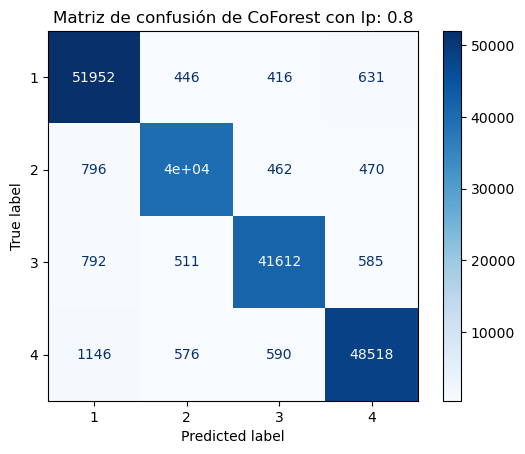

In [125]:
cm_model_percentage('CoForest', 0.8)

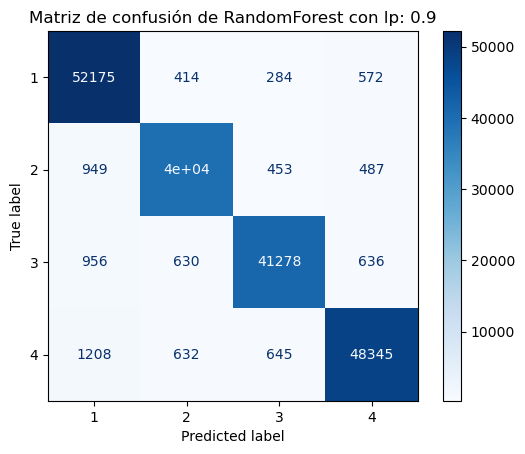

In [140]:
cm_model_percentage('RandomForest', 0.9)

### **3.1.3. Evolución de precisiónes**

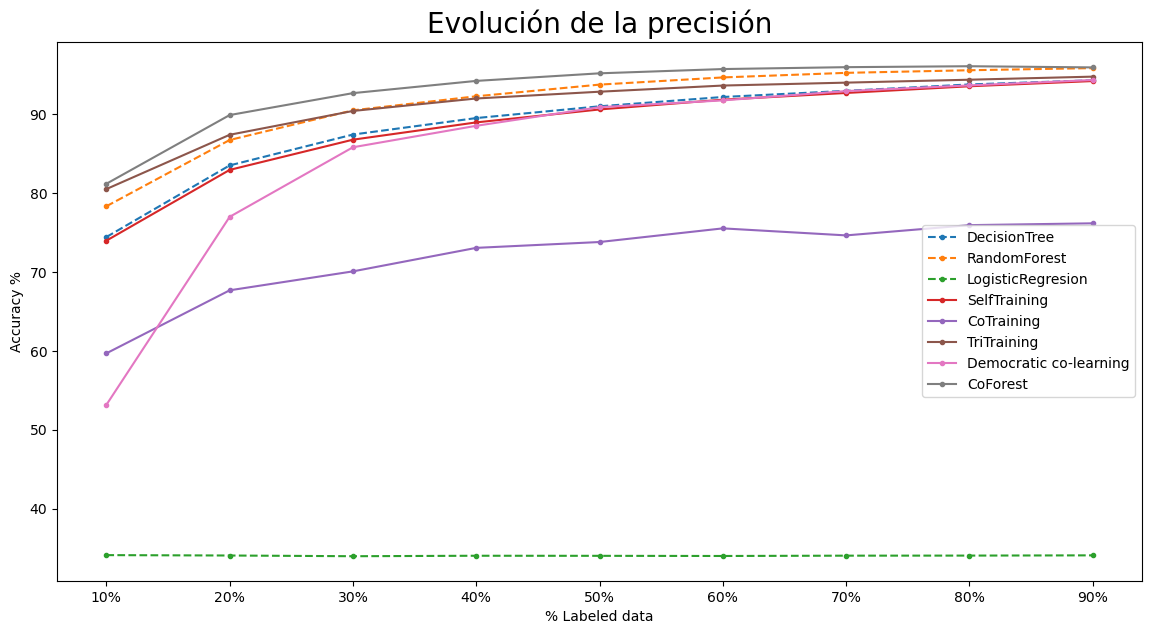

In [141]:
# Evolución de la precisión
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(Tabla.columns, Tabla.loc['DecisionTree'].astype(float), '.--', label='DecisionTree')
ax.plot(Tabla.columns, Tabla.loc['RandomForest'].astype(float), '.--', label='RandomForest')
ax.plot(Tabla.columns, Tabla.loc['LogisticRegresion'].astype(float), '.--', label='LogisticRegresion')
ax.plot(Tabla.columns, Tabla.loc['SelfTraining'].astype(float), '.-',label='SelfTraining')
ax.plot(Tabla.columns, Tabla.loc['CoTraining'].astype(float), '.-', label='CoTraining')
ax.plot(Tabla.columns, Tabla.loc['TriTraining'].astype(float), '.-', label='TriTraining')
ax.plot(Tabla.columns, Tabla.loc['DemocraticCo'].astype(float), '.-',label='Democratic co-learning')
ax.plot(Tabla.columns, Tabla.loc['CoForest'].astype(float), '.-', label='CoForest')

plt.ylabel('Accuracy %')
plt.xlabel('% Labeled data')
plt.title('Evolución de la precisión', fontsize=20)

plt.legend(loc='best')
plt.show()

# **4. Evaluación de la calidad de los resultados**

  Para la evaluación de la calidad de las predicciones generadas por la mejor metodología se realiza un entrenamiento cásico de una metodología supervisada. 

  Obtenemos los subconjuntos de entrenamiento desetiquetando el 80% de los datos del conjunto total (X_all, y_all).

   Es decir tendremos el subconjunto (X_unlabel, y_pred) de las intancias que han sido desetiquetadas y reetiquetadas por CoForest. Y (X_unlabel, y_unlabel) donde y_unlabel corresponden a las etiquetas reales proporcionadas por el dataset original.

In [183]:
# Renombramos los subconjuntos 
y = y_all.flatten()
X = X_all
# Obtenemos el subconjunto de features y sus etiquetas (X_ssl, y_ssl) y el subconjunto desetiquetado (X_unlabel) y sus correspondientes etiquetas (y_unlabel)
X_ssl, y_ssl, X_unlabel, y_unlabel = artificial_ssl_dataset(X, y, label_rate= 0.2, random_state= random_state)

# Hallamos las etiquetas del dataset desetiquetado
coforest = CoForest(random_state=random_state).fit(X_ssl, y_ssl)
y_coforest_pred = coforest.predict(X_unlabel)

In [184]:
print(f'Las dimensiones de los subconjuntos son: {X_unlabel.shape} para las features y {y_coforest_pred.shape} para el target')

Las dimensiones de los subconjuntos son: (30288, 8) para las features y (30288,) para el target


**RandomForest - Subconjunto predecido (X_unlabel, y_pred)**

In [195]:
# Generamos los conjuntos train y test
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_unlabel, y_coforest_pred, test_size=0.2, random_state=random_state)
# Modelo
randforest = RandomForestClassifier(n_estimators=7)
# Entrenamos el modelo
randforest.fit(X_train_pred, y_train_pred)
y_pred = randforest.predict(X_test_pred)
acc_pred = accuracy_score(y_test_pred, y_pred)*100

**RandomForest - Subconjunto real (X_unlabel, y_unlabel)**

In [186]:
# Generamos los conjuntos train y test
X_train, X_test, y_train, y_test = train_test_split(X_unlabel, y_unlabel, test_size=0.2, random_state=random_state)
# Modelo
randforest = RandomForestClassifier(n_estimators=7)
# Entrenamos el modelo
randforest.fit(X_train, y_train)
y_real = randforest.predict(X_test)
acc_real = accuracy_score(y_test, y_real)*100

### **4.1 Resultados**

In [208]:
print(f'Las dimensiones de los subconjuntos con los que se ha entrenado RandomForest son de {X_train.shape[0]} instancias y las del conjunto de validación {y_test.shape[0]}')

Las dimensiones de los subconjuntos con los que se ha entrenado RandomForest son de 24230 instancias y las del conjunto de validación 6058


In [196]:
# Tabla de resultados 
Tabla3 = pd.DataFrame(columns=['Etiquetas predichas','Etiquetas reales'])
Tabla3.loc[''] = [round(acc_pred,2), round(acc_real,2)]
Tabla3

,Etiquetas predichas,Etiquetas reales
,92.39,95.2


### **Matrices de confusión**

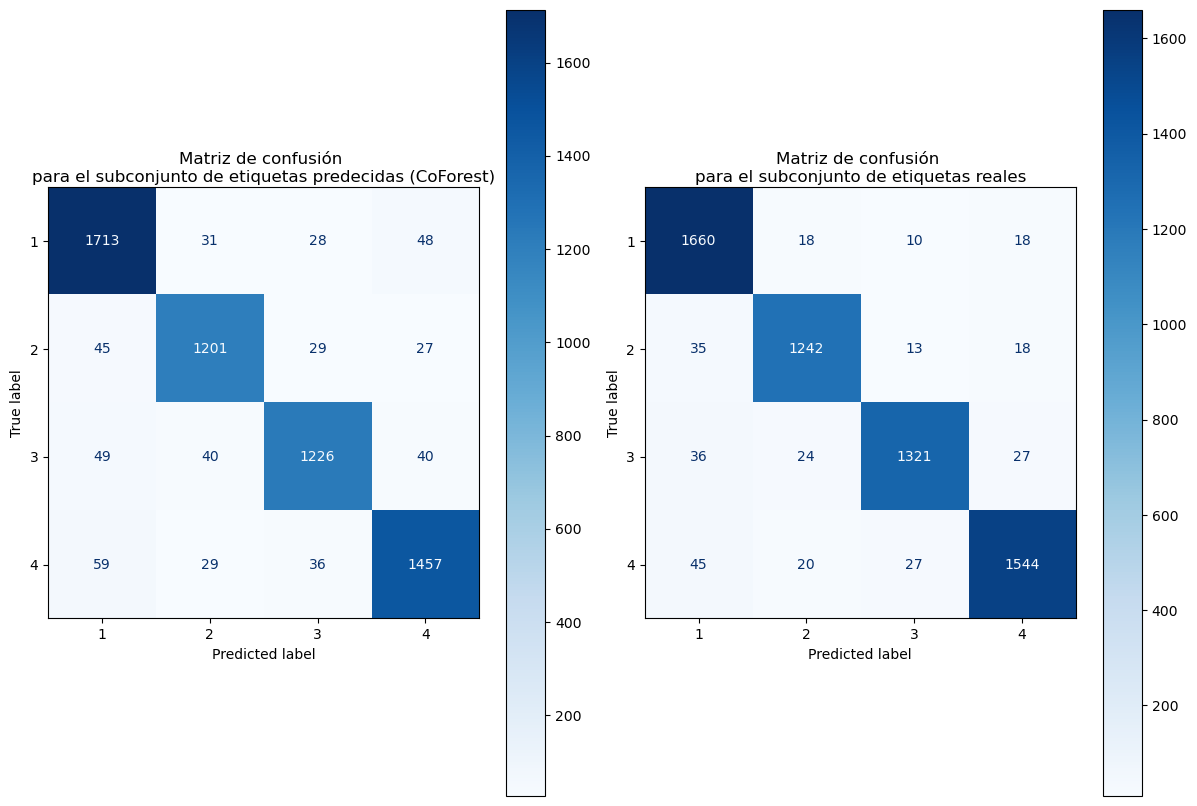

In [197]:
# Creamos las matrizes de confusión
cm_pred = confusion_matrix(y_test_pred, y_pred)
cm_real = confusion_matrix(y_test, y_real)

# Mostramos la matriz de confusión
labels_names = ['1', '2', '3', '4']
cm_pred_display = ConfusionMatrixDisplay(confusion_matrix=cm_pred, display_labels=labels_names)
cm_real_display = ConfusionMatrixDisplay(confusion_matrix=cm_real, display_labels=labels_names)

# Creamos la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Primer subplot
cm_pred_display.plot(include_values=True, cmap='Blues', ax=axs[0], xticks_rotation='horizontal')
title_pred = 'Matriz de confusión \npara el subconjunto de etiquetas predecidas (CoForest)'
axs[0].set_title(title_pred, wrap=True, loc='center')

# Segundo subplot
cm_real_display.plot(include_values=True, cmap='Blues', ax=axs[1], xticks_rotation='horizontal')
title_real = 'Matriz de confusión \npara el subconjunto de etiquetas reales'
axs[1].set_title(title_real, wrap=True, loc='center')

# Ajustamos el espacio entre subplots
plt.tight_layout(pad=0.5)

# Mostrar los gráficos
plt.show()

# **5. Conclusiones**

Por lo general, el etiquetado de los modelos funciona muy bien para el conjunto de datos seleccionado, a excepción de la metodología Logistic Regresión que apenas consigue alcanzar el 35 % de accuracy. Esto puede ser debido a la finalidad de la Regresión Logística ya que si la relación entre las variables no es lineal, es posible que la regresión logística no pueda captar adecuadamente la complejidad del problema, lo que puede conducir a obtener precisiones más bajas. 


 Este resultado es esperable debido a la gran cantidad de datos (Del orden de 40.000 instancias), anteriormente hemos explicado como un mayor número de instancias permite a los modelos determinar características más complejas y poder realizar una mejor generalización. Esto se refuerza con que a medida que el porcentaje de etiquetas aumenta obtenemos precisiones más cercanas al 100%. 
 

 Hemos de añadir que el siguiente estudio se ha realizado para un conjunto de datos que requieren de un etiquetado multietiqueta. Sería interesante evaluar los resultados de diferentes conjuntos de datos de distintos tamaños que requieran de un etiquetado multiclase para poder llegar a unos resultados generalistas, y evaluar si las precisiones obtenidas siguen siendo de alta calidad.  Así como en problemas de clasificación binaria y el estudio de mejores parámetros para ello ya que para el siguiente proyecto las metodologías ejecutadas se realizaron con los parámetros estándares de las librerías.
 Esta sería la metodología a seguir para poder alcanzar el conocimiento de una metodología capaz de generar etiquetas de alta calidad según el problema a resolver y dar una sólida solución al cuello de botella del etiquetado.  Sin embargo, debido al gran número de lecturas sobre el objetivo de la creación de los algoritmos semi-supervisados, se esperaba que los métodos semi-supervisados presentasen resultados mucho mejores a los supervisados en el etiquetado, ya que apenas hay una mejora significativa en la precisión de CoForest con su supervisado RandomForest. 
 Para un 80% de etiquetas CoForest alcanzó un valor de precisión de 96.08% y RndomForest de 95.57%, es decir CoForest lo superó por un 0.5%. Además ambas matrices de confusión reflejan cómo ambas metodologías consiguen identificar y clasificar las cuatro clases perfectamente.

En cuanto a los resultados obtenidos en el último apartado; El entrenamiento clásico de un modelo supervisado. Muestran cómo el subconjunto de etiquetas originales devuelve una mayor precisión que el re-etiquetado por la mejor metodología de la **Tabla Resultados 3.1.**.

Para este apartado se eligió RandomForest como modelo supervisado debido al alto rendimiento presentado en la primera parte del experimento. Se generó un nuevo subconjunto donde el 80% de sus etiquetas fueron re-etiquetadas por CoForest (Mejor metodología de la **Tabla Resultados 3.1.**).

La obtención de un mayor rendimiento por el subconjunto de etiquetas originales respecto al de etiquetas predichas [**Tabla Resultados 4.1.**], puede deberse al error asociado que arrastra la predicción, es decir, al reetiquetar de nuevo con CoForest este algoritmo comete un pequeño error que luego se ve reflejado en la nueva producción de etiquetas por la metodología clásica. Sin embargo, dicho error no es muy significativo ya que el accuracy obtenido por el subconjunto de etiquetas predecidas por coforest, es un 3% menor que el obtenido con las etiquetas originales.

Observando las matrices de confusión de ambos subconjuntos [**Matriz confusiòn 4.1.**] vemos cómo la metodología supervisada RandomForest es capaz de clasificar con gran precisión las distintas clases. Se puede apreciar cómo la matriz de la izquierda correspondiente al subconjunto de etiquetas predichas por CoForest muestra más falsos positivos que la matriz de confusión de las etiquetas reales, matriz derecha. Como ya hemos explicado antes esto es debido a que la propia predicción de etiquetas por un algoritmo de aprendizaje automático lleva asociado un cierto error en el etiquetado, por lo que este error se ve propagado tras un nuevo etiquetado de los datos. Sin embargo, podemos concluir que la metodología semi-supervisada CoForest es capaz de generar etiquetas de alta calidad para el conjunto de datos propuesto.